<a href="https://colab.research.google.com/github/alecgarza96/Heart-Attack-Predictions/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def make_distr_plot(dataset, X, title):
  sns.displot(data=dataset, x=X)
  plt.xticks(rotation=90)
  plt.title(title)
  plt.show()

def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train,y_train)
  return model.score(X_test, y_test)

def unique_val_dict(df):
  dict = {}
  for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

  return pd.DataFrame(dict,index=["unique count"]).transpose()


heart_df = pd.read_csv('/content/heart.csv')
o2 = pd.read_csv('/content/o2Saturation.csv')

print("Dataset overview")
print(heart_df.head())

print("\nDataset Statistical Overview")
print(heart_df.describe())

print('\nTotal Missing values in each dataset')
print(heart_df.isnull().sum())

print('\nChecking datatypes')
print(heart_df.dtypes)

print("\nChecking and Removing Duplicate Rows")
print(heart_df[heart_df.duplicated()])
heart_df.drop_duplicates(inplace=True)

print("\nThe shape of data is: ")
print(heart_df.shape)

print('\nChecking Unique Values')
unique_vals = unique_val_dict(heart_df)
print(unique_vals)

Dataset overview
   age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0   63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1   37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2   41    0   1     130   204    0  ...     0      1.4    2    0      2       1
3   56    1   1     120   236    0  ...     0      0.8    2    0      2       1
4   57    0   0     120   354    0  ...     1      0.6    2    0      2       1

[5 rows x 14 columns]

Dataset Statistical Overview
              age         sex          cp  ...         caa       thall      output
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.

In [193]:
categorical_cols = [x for x in heart_df.columns if heart_df[x].max() == 1]
categorical_cols.append('cp')
categorical_cols.append('restecg')
categorical_cols.append('caa')
categorical_cols.append('thall')
categorical_cols.append('slp')
categorical_cols.remove('output')
print("Categorical columns:", categorical_cols)

continuous_cols = [x for x in heart_df.columns if heart_df[x].max() != 1]
continuous_cols.remove('cp')
continuous_cols.remove('restecg')
continuous_cols.remove('thall')
continuous_cols.remove('caa')
continuous_cols.remove('slp')
print("Continuous columns:", continuous_cols)

Categorical columns: ['sex', 'fbs', 'exng', 'cp', 'restecg', 'caa', 'thall', 'slp']
Continuous columns: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


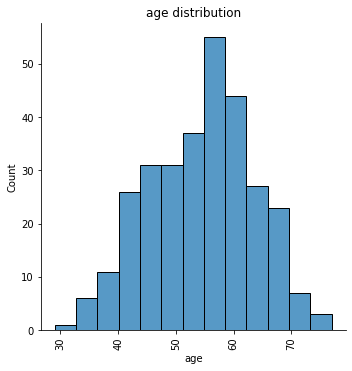

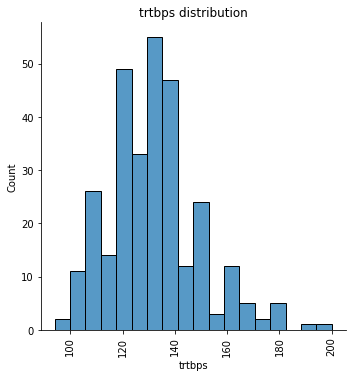

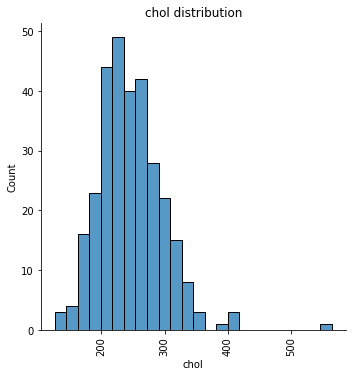

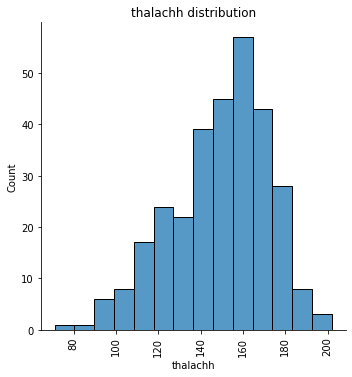

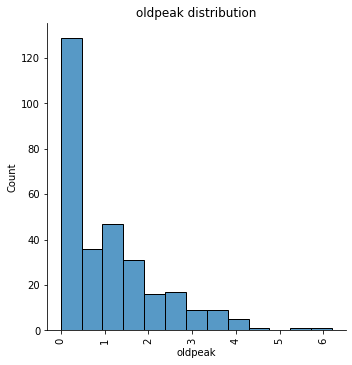

In [194]:
for col in range(len(continuous_cols)):
  make_distr_plot(heart_df, continuous_cols[col], continuous_cols[col]+" distribution")
  print('\n')

Sex Breakdown

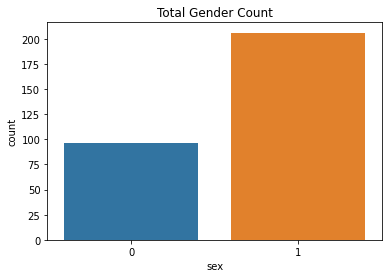

In [195]:
sns.countplot(data=heart_df, x='sex')
plt.title("Total Gender Count")
plt.show()

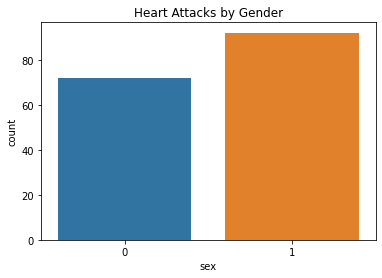

In [196]:
sns.countplot(data=heart_df.loc[heart_df['output']==1], x='sex')
plt.title("Heart Attacks by Gender")
plt.show()

In [197]:
dfcopy = heart_df

dfcopy = pd.get_dummies(dfcopy, columns = categorical_cols, drop_first=True)

y, X = dfcopy['output'], dfcopy.drop('output', axis=1)

X[continuous_cols] = RobustScaler().fit_transform(X[continuous_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
print("Support Vector Classifier Score:", get_score(SVC(), X_train, X_test, y_train, y_test)*100)
print("Logistic Regression Score:",get_score(LogisticRegression(), X_train, X_test, y_train, y_test)*100)
print("Random Forest Classifer Score:",get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)*100)


Support Vector Classifier Score: 85.24590163934425
Logistic Regression Score: 88.52459016393442
Random Forest Classifer Score: 85.24590163934425
